In [1]:
#Create Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [2]:
#Merge the DataFrames
#Summary & Imports Mortality

summary1_df = pd.read_csv("World_Development_indicators.csv")
summary1_df.head()

,Unnamed: 0,CountryName_GDP_Cap,CountryCode,IndicatorName_GDP_Cap,IndicatorCode_GDP_Cap,1960_GDP_Cap,1961_GDP_Cap,1962_GDP_Cap,1963_GDP_Cap,1964_GDP_Cap,...,2010_Imports,2011_Imports,2012_Imports,2013_Imports,2014_Imports,2015_Imports,2016_Imports,2017_Imports,2018_Imports,2019_Imports
0,0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,1.854190e+09,2.136313e+09,2.089385e+09,2.130726e+09,2.113408e+09,2.035754e+09,1.975419e+09,2.031844e+09,NaN,NaN
1,1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,...,9.950050e+09,1.190656e+10,1.252506e+10,1.133990e+10,1.053200e+10,8.647160e+09,8.079197e+09,9.153344e+09,NaN,NaN
2,2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,3.568226e+10,4.394739e+10,4.591971e+10,4.930420e+10,5.047164e+10,3.849951e+10,2.552939e+10,2.839711e+10,NaN,NaN
3,3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,5.792202e+09,6.700290e+09,5.860856e+09,5.999409e+09,6.243051e+09,5.071012e+09,5.436291e+09,6.070288e+09,6.856193e+09,NaN
4,4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
summary_1990_GDP_df = summary1_df.sort_values("1990_GDP_Cap")
summary_1990_GDP_df.head()
summary_variable=summary_1990_GDP_df['1990_GDP_Cap'].dropna()
summary_variable

255       95.188250
211      126.924920
208      150.389032
244      173.790639
176      191.878904
           ...     
221    30343.182870
142    34645.143240
35     38428.385500
135    49375.325280
147    84289.559540
Name: 1990_GDP_Cap, Length: 221, dtype: float64

In [4]:
summary_new=summary_variable[0:5]

summary_new

255     95.188250
211    126.924920
208    150.389032
244    173.790639
176    191.878904
Name: 1990_GDP_Cap, dtype: float64

In [27]:
summary1_df.iloc[[255,211,208,244,176],[1]]

,CountryName_GDP_Cap
255,Vietnam
211,Somalia
208,Sierra Leone
244,Tanzania
176,Nepal


In [30]:
GDP_Cap = [95.188250,126.924920, 150.389032, 173.790639, 191.878904]
country = ['Vietnam','Somalia','Seora Leone','Tanzania','Nepal']

#dataframe
data = {'country': pd.Series(country), 'GDP_Cap': pd.Series(GDP_Cap)}
dataframe =pd. DataFrame(data)
dataframe

,country,GDP_Cap
0,Vietnam,95.188250
1,Somalia,126.924920
2,Seora Leone,150.389032
3,Tanzania,173.790639
4,Nepal,191.878904


Text(0, 0.5, 'GDP per capita')

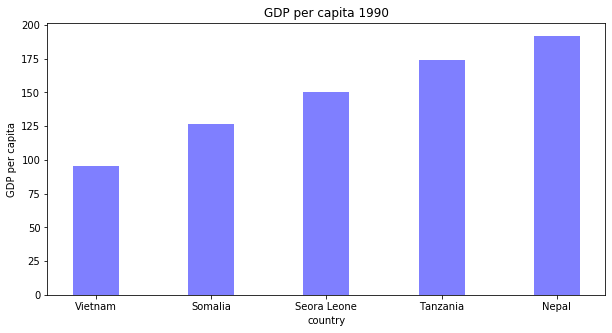

In [32]:
plt.figure(figsize=(10,5))
plt.bar(country,GDP_Cap, color = "b", alpha = 0.5, width = 0.4)

# Set a Title and labels
plt.title("GDP per capita 1990")
plt.xlabel("country")
plt.ylabel("GDP per capita")

In [7]:
summary_new1=summary_variable[-6:-1]
summary_new1 

73     28364.64508
221    30343.18287
142    34645.14324
35     38428.38550
135    49375.32528
Name: 1990_GDP_Cap, dtype: float64

In [8]:
summary1_df.iloc[[73, 221,142,35,135],[1]]

,CountryName_GDP_Cap
73,Finland
221,Sweden
142,Luxembourg
35,Switzerland
135,Liechtenstein


In [18]:
GDP_Cap1 = [28364.64508,30343.18287,34645.14324,38428.38550, 49375.32528]
country1 = ['Finland','Sweden', 'Luxembourg','Switzeland', 'Liechtenstein']

#dataframe
data1 = {'country1': pd.Series(country1), 'GDP_Cap1': pd.Series(GDP_Cap1)}
dataframe1 =pd. DataFrame(data)
dataframe1

,country,GDP_Cap
0,255,95.188250
1,211,126.924920
2,208,150.389032
3,244,173.790639
4,176,191.878904


Text(0, 0.5, 'GDP per capita')

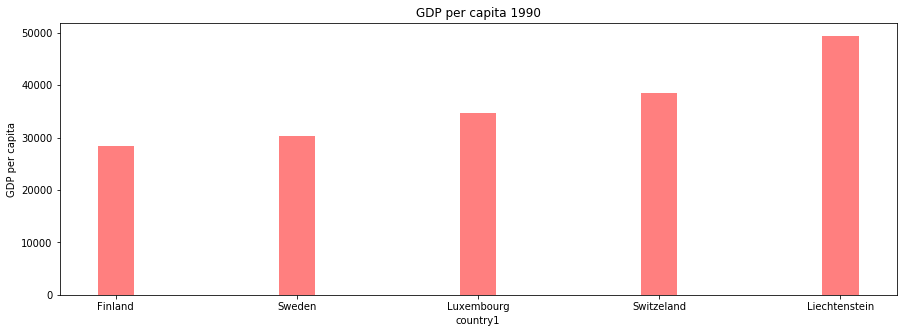

In [20]:
plt.figure(figsize=(15,5))
plt.bar(country1,GDP_Cap1, color = "r", alpha = 0.5, width = 0.2)

# Set a Title and labels
plt.title("GDP per capita 1990")
plt.xlabel("country1")
plt.ylabel("GDP per capita")

In [41]:
#2007
summary_2007_GDP_df = summary1_df.sort_values("2017_GDP_Cap")
summary_2007_GDP_df.head()
summary_variable=summary_2007_GDP_df['2017_GDP_Cap'].dropna()
summary_variable

14        292.997631
211       309.055355
166       356.717573
171       375.869490
32        449.786424
           ...      
106     80989.172210
50      81124.513480
144     81516.674920
142    107361.306900
147    167101.759400
Name: 2017_GDP_Cap, Length: 247, dtype: float64

In [42]:
summary_new07=summary_variable[0:5]

summary_new07

14     292.997631
211    309.055355
166    356.717573
171    375.869490
32     449.786424
Name: 2017_GDP_Cap, dtype: float64

In [43]:
summary1_df.iloc[[14,211,166,171,32],[1]]

,CountryName_GDP_Cap
14,Burundi
211,Somalia
166,Malawi
171,Niger
32,Central African Republic


In [44]:
GDP_Cap07 = [172.495860, 244.286037, 286.330492, 292.219734,332.259144]
country07 = ['Burundi','Somalia',' Malawi','Niger','Central Africa Republic']

#dataframe
data07 = {'country07': pd.Series(country07), 'GDP_Cap07': pd.Series(GDP_Cap07)}
dataframe07 =pd. DataFrame(data07)
dataframe07

,country07,GDP_Cap07
0,Burundi,172.495860
1,Somalia,244.286037
2,Malawi,286.330492
3,Niger,292.219734
4,Central Africa Republic,332.259144


Text(0, 0.5, 'GDP per capita')

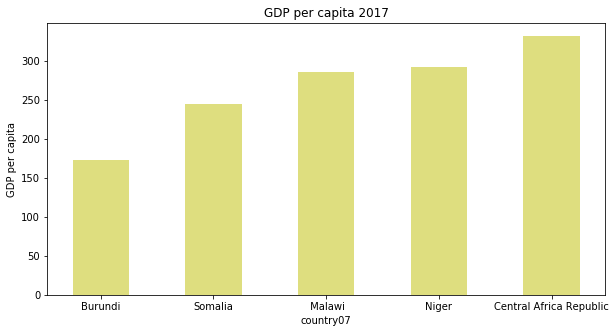

In [51]:
plt.figure(figsize=(10,5))
plt.bar(country07,GDP_Cap07, color = "y", alpha = 0.5, width = 0.5)

# Set a Title and labels
plt.title("GDP per capita 2017")
plt.xlabel("country07")
plt.ylabel("GDP per capita")

In [46]:
summary_new_bottom5=summary_variable[-6:-1]

summary_new_bottom5

35      80450.04582
106     80989.17221
50      81124.51348
144     81516.67492
142    107361.30690
Name: 2017_GDP_Cap, dtype: float64

In [47]:
summary1_df.iloc[[35,106,50,144,142],[1]]

,CountryName_GDP_Cap
35,Switzerland
106,Isle of Man
50,Cayman Islands
144,"Macao SAR, China"
142,Luxembourg


In [48]:
GDP_Cap_Top5 = [85139.96045,85434.26817,90849.58698,106018.49280,130655.63700]
country_Top5 = ['Switzerland','Isle of Man', 'Cayman Islands', 'Macao SAR China','Luxembourg']

#dataframe
data_Top5 = {'country_Top5': pd.Series(country_Top5), 'GDP_Cap_Top5': pd.Series(GDP_Cap_Top5)}
dataframe_Top5 =pd. DataFrame(data_Top5)
dataframe_Top5

,country_Top5,GDP_Cap_Top5
0,Switzerland,85139.96045
1,Isle of Man,85434.26817
2,Cayman Islands,90849.58698
3,Macao SAR China,106018.49280
4,Luxembourg,130655.63700


Text(0, 0.5, 'GDP per capita')

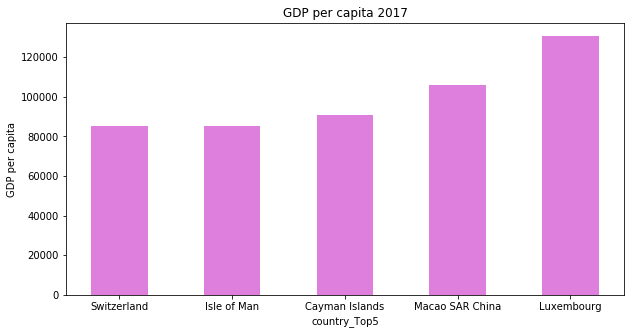

In [50]:
plt.figure(figsize=(10,5))
plt.bar(country_Top5, GDP_Cap_Top5, color = "m", alpha = 0.5, width = 0.5)

# Set a Title and labels
plt.title("GDP per capita 2017")
plt.xlabel("country_Top5")
plt.ylabel("GDP per capita")

In [40]:
summary_1990_GDP_df = summary1_df.sort_values("1990_GDP_Cap")
summary_1990_GDP_df.head()
summary_variable=summary_1990_GDP_df['1990_GDP_Cap'].dropna()
summary_variable

255       95.188250
211      126.924920
208      150.389032
244      173.790639
176      191.878904
           ...     
221    30343.182870
142    34645.143240
35     38428.385500
135    49375.325280
147    84289.559540
Name: 1990_GDP_Cap, Length: 221, dtype: float64

In [39]:
summary_2007_GDP_df = summary1_df.sort_values("2007_GDP_Cap")
summary_2007_GDP_df.head()
summary_variable=summary_2007_GDP_df['2007_GDP_Cap'].dropna()
summary_variable

14        172.495860
70        244.286037
41        286.330492
171       292.219734
166       332.259144
           ...      
50      85434.268170
25      90849.586980
142    106018.492800
135    130655.637000
147    169961.383900
Name: 2007_GDP_Cap, Length: 253, dtype: float64